In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


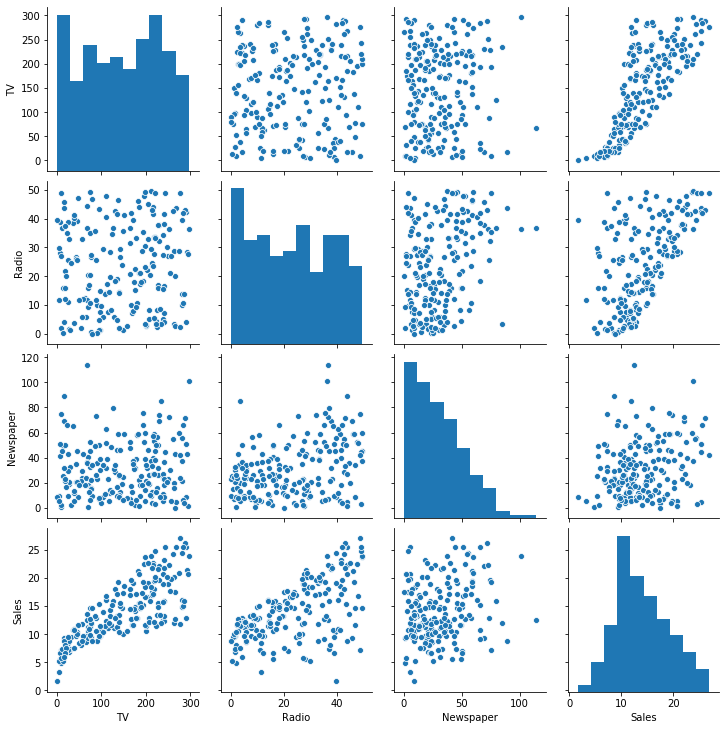

In [7]:
sns.pairplot(df)

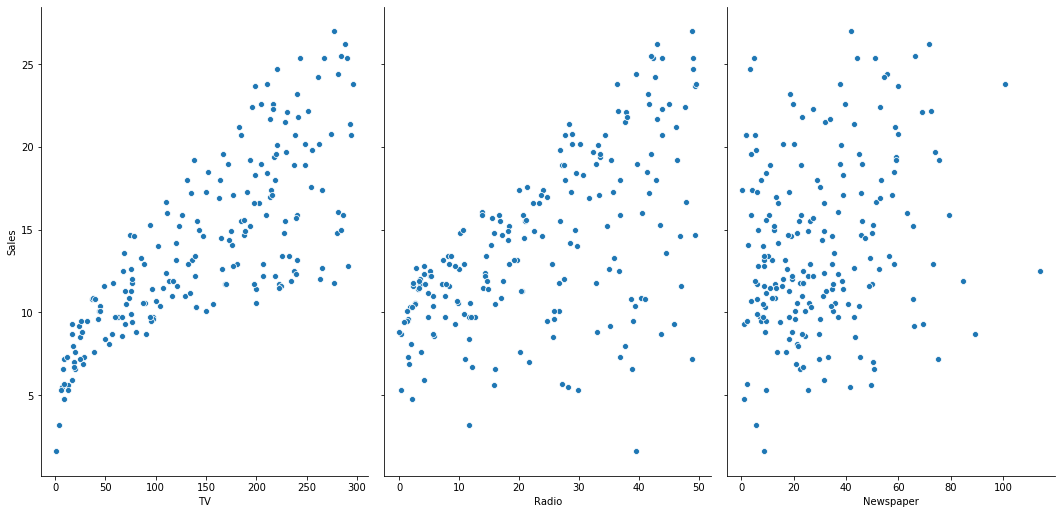

In [9]:
sns.pairplot(df,x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size=7, aspect=.7, kind='scatter')

In [10]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state=100)

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)

#Model Evalution
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_, X_test.columns, columns=['Coefficient']))

Intercept: 2.6527896688794943
Coefficient: [0.0454256  0.18975773 0.00460308]


In [12]:
#Prediction
Y_pred = lr.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mns = mean_squared_error(Y_test, Y_pred)
r_score = r2_score(Y_test, Y_pred)

print('Mean Squared Error: {}'.format(mns))
print('R2 Score {}'.format(r_score))

Mean Squared Error: 1.8506819941636972
R2 Score 0.9058622107532245


In [14]:
import statsmodels.api as sm

X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

lr_1 = sm.OLS(Y_train, X_train_sm).fit()

lr_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [15]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sat, 02 May 2020   Prob (F-statistic):           9.97e-66
Time:                        04:29:05   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

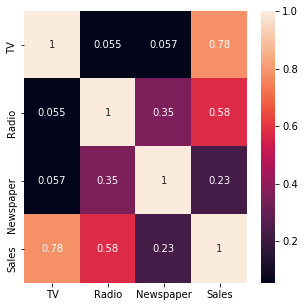

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot = True)

In [18]:
new_X_train = X_train[['TV','Radio']]
new_X_test = X_test[['TV','Radio']]

lr.fit(new_X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
new_Y_pred = lr.predict(new_X_test)

Text(0, 0.5, 'Sales')

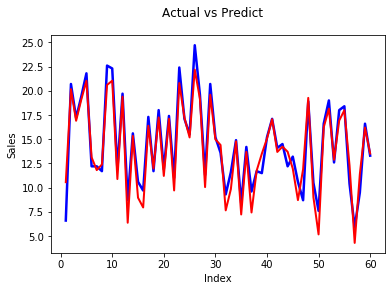

In [35]:
plt.figure()
index= [x for x in range(1,61,1)]
plt.plot(index,Y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(index,new_Y_pred, color='red',linewidth=2.0,linestyle='-')
plt.suptitle('Actual vs Predict')
plt.xlabel('Index')
plt.ylabel('Sales')

In [37]:
new_mse = mean_squared_error(Y_test, new_Y_pred)
r_square = r2_score(Y_test, new_Y_pred)

print('Mean Squared Error: {}'.format(new_mse))
print('R Square: {}'.format(r_square))

Mean Squared Error: 1.784740052090281
R Square: 0.909216449171822


In [40]:
X_train_final = new_X_train
X_train_final = sm.add_constant(X_train_final)
new_lr = sm.OLS(Y_train,X_train_final).fit()
print(new_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sat, 02 May 2020   Prob (F-statistic):           4.46e-67
Time:                        04:51:03   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0